<h1>Task-04</h1>

<h3>Step 1: Import the necessary libraries and modules</h3>

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

<h3>Step 2: Load the training dataset</h3>

In [3]:
col=['Id' , 'Entity' , 'Sentiment' , 'Content']
df_train=pd.read_csv("Twitter Dataset/twitter_training.csv" , names=col)
df_train.head(10)

,Id,Entity,Sentiment,Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
5,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
6,2402,Borderlands,Positive,So I spent a few hours making something for fu...
7,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
8,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
9,2402,Borderlands,Positive,So I spent a few hours making something for fu...


In [4]:
df_test=pd.read_csv("Twitter Dataset/twitter_validation.csv" , names=col)
df_test.head(10)

,Id,Entity,Sentiment,Content
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
6,7925,MaddenNFL,Positive,Thank you @EAMaddenNFL!! \n\nNew TE Austin Hoo...
7,11332,TomClancysRainbowSix,Positive,"Rocket League, Sea of Thieves or Rainbow Six: ..."
8,1107,AssassinsCreed,Positive,my ass still knee-deep in Assassins Creed Odys...
9,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...


<h3>Data Summary of df_train</h3>

In [5]:
df_train.shape

(74682, 4)

In [6]:
df_train.columns

Index(['Id', 'Entity', 'Sentiment', 'Content'], dtype='object')

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
df_train.dtypes

Id            int64
Entity       object
Sentiment    object
Content      object
dtype: object

<h3>Step 3: Check the data for null values and outliers, and clean them</h3>

In [9]:
df_train.isnull().sum()

Id             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [10]:
df_train.dropna(subset=['Content'] , inplace=True)

In [11]:
df_train.shape

(73996, 4)

In [12]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [13]:
df_train.Sentiment=df_train.Sentiment.replace('Irrelevant' , 'Neutral')
df_test.Sentiment=df_test.Sentiment.replace('Irrelevant' , 'Neutral')

In [14]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

<h3>Step 4: Perform Exploratory Data Analysis (EDA) on the training dataset</h3>

In [15]:
sentiment_count=df_train.Sentiment.value_counts()
sentiment_count

Sentiment
Neutral     30983
Negative    22358
Positive    20655
Name: count, dtype: int64

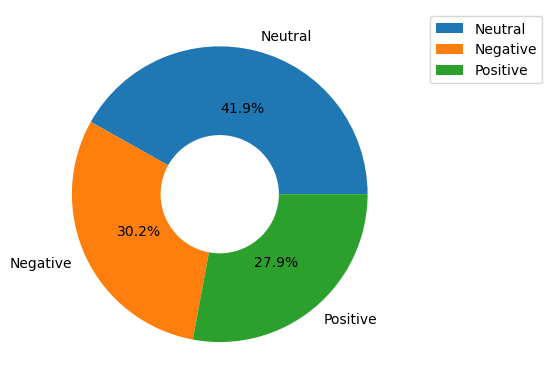

In [16]:
y=['Neutral' , 'Negative' , 'Positive']
plt.pie(sentiment_count , labels=y, autopct='%0.1f%%' )
circle=plt.Circle((0,0),0.4, facecolor='white')
plt.gca().add_patch(circle)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [17]:
df_train.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [18]:
Entity_count=df_train.Entity.value_counts()
Entity_count

Entity
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)                        2283
Borderlands                

In [19]:
Entity_sort=Entity_count.sort_values(ascending=False)

In [20]:
Entity_top10=Entity_sort.head(10)
Entity_top10

Entity
MaddenNFL               2377
LeagueOfLegends         2377
CallOfDuty              2376
Verizon                 2365
TomClancysRainbowSix    2364
Facebook                2362
Microsoft               2361
Dota2                   2359
WorldOfCraft            2357
ApexLegends             2353
Name: count, dtype: int64

In [21]:
Entity_index=Entity_top10.index

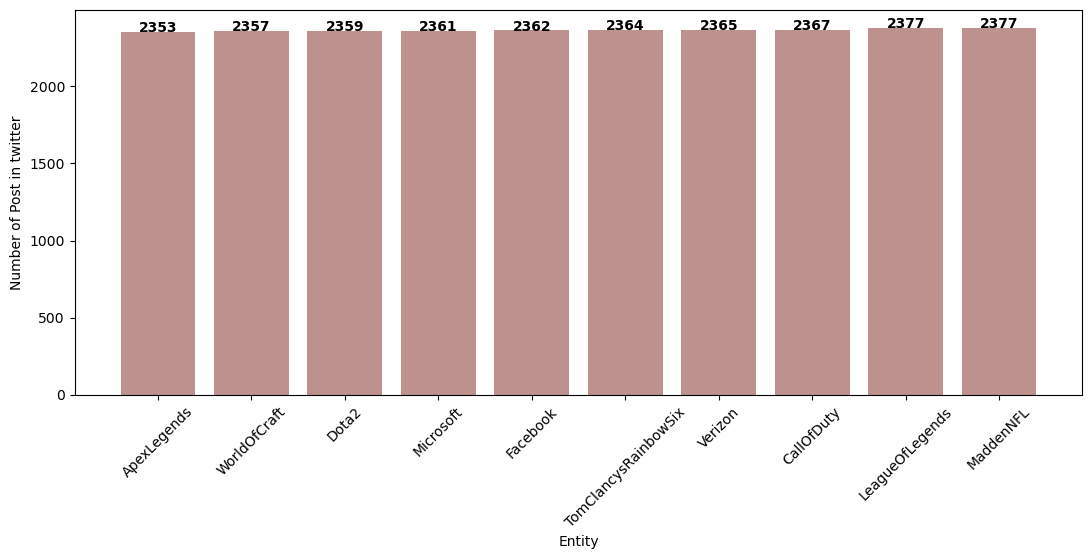

In [22]:
plt.figure(figsize=(13,5))

x=['ApexLegends' , 'WorldOfCraft' , 'Dota2' , 'Microsoft' , 'Facebook' , 'TomClancysRainbowSix' , 'Verizon' , 'CallOfDuty' , 'LeagueOfLegends' , 'MaddenNFL']
y=[2353,2357,2359,2361,2362,2364,2365,2367,2377,2377]

plt.bar( x , y , alpha=0.7 , color='#A2625D')

for i,v in enumerate(y):
    plt.text(i,v,str(v),ha='center',weight='bold' )

plt.xticks(rotation=45)
plt.xlabel('Entity')
plt.ylabel('Number of Post in twitter')
plt.show()

In [23]:
Entity_top3_df=Entity_sort.head(3)
Entity_top3_df

Entity
MaddenNFL          2377
LeagueOfLegends    2377
CallOfDuty         2376
Name: count, dtype: int64

In [24]:
Entity_top3=Entity_top3_df.index.tolist()
Entity_top3

['MaddenNFL', 'LeagueOfLegends', 'CallOfDuty']

In [25]:
sentiment_by_entity=df_train.loc[df_train['Entity'].isin(Entity_top3)].groupby('Entity')['Sentiment'].value_counts().sort_index()
sentiment_by_entity

Entity           Sentiment
CallOfDuty       Negative      883
                 Neutral      1047
                 Positive      446
LeagueOfLegends  Negative      632
                 Neutral      1130
                 Positive      615
MaddenNFL        Negative     1694
                 Neutral       287
                 Positive      396
Name: count, dtype: int64

<h3>Step 5: Format the data and create a model for the data</h3>

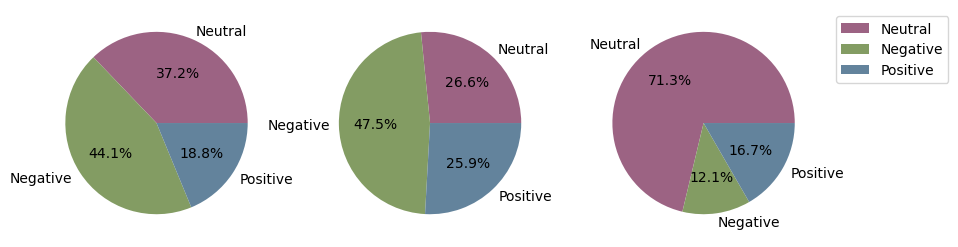

In [26]:
plt.figure(figsize=(10,5))

y=['Neutral' , 'Negative' , 'Positive']
color=['#9C6383' , '#839C63' , '#63839C']

plt.subplot(1,3,1)
plt.pie(sentiment_by_entity[:3] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,2)
plt.pie(sentiment_by_entity[3:6] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.subplot(1,3,3)
plt.pie(sentiment_by_entity[6:] , labels=y , autopct='%0.1f%%' , textprops={'fontsize':10} , colors=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left' , fontsize="10")

In [27]:
df_train.drop(['Id'] , axis=1 , inplace=True)

In [28]:
df_test.drop(['Id'] , axis=1 , inplace=True)

In [29]:
#train test split
X_train=df_train.drop(['Sentiment'] , axis=1)
X_test=df_test.drop(['Sentiment'] , axis=1)
y_train=df_train['Sentiment']
y_test=df_test['Sentiment']

In [30]:
df_train.Sentiment.unique()

array(['Positive', 'Neutral', 'Negative'], dtype=object)

In [31]:
v=CountVectorizer()
X_train_count=v.fit_transform(X_train.Content)

In [32]:
#Label Encoding
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [33]:
y_train

array([2, 2, 2, ..., 2, 2, 2])

In [34]:
X_train.drop(['Entity'],axis=1,inplace=True)
X_test.drop(['Entity'],axis=1,inplace=True)

In [35]:
#Multinomial Naive Bayes Model Classifier

model=MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

<h3>Step 6: Predict the sentiment of the text comment using the trained model</h3>

In [36]:
comment=[
    'I am coming to the borders and I will kill you.'
]
comment_count=v.transform(comment)
model.predict(comment_count)

array([2])

In [37]:
X_test_count=v.transform(X_test.Content)
X_test_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
X_test_count.shape

(1000, 31062)

<h3>Step 7: Calculate the score of the model</h3>

In [45]:
score = model.score(X_test_count,y_test)

print(f"Score: {score}")

Score: 0.846
